In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

all_shots = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/NBA%20shot%20logs/shot_logs.csv')
columns = all_shots.columns
columns = columns.str.lower()
all_shots.columns = columns

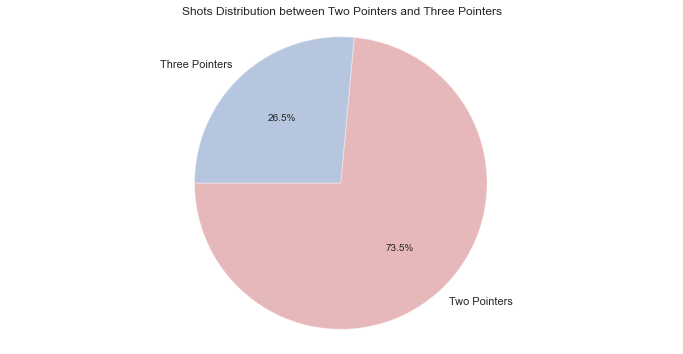

In [76]:
all_shots_copy = all_shots.copy()
colors = sb.color_palette()[0]
shot_types = ['Two Pointers', 'Three Pointers']

shots_type = all_shots_copy.groupby('pts_type')['pts_type'].count()


plt.figure(figsize=[12, 6]);
plt.pie(shots_type, labels=shot_types, autopct='%1.1f%%', shadow=False, startangle=180, colors=['r', 'b'],wedgeprops={'alpha':0.4})
plt.title('Shots Distribution between Two Pointers and Three Pointers');
plt.axis('equal');

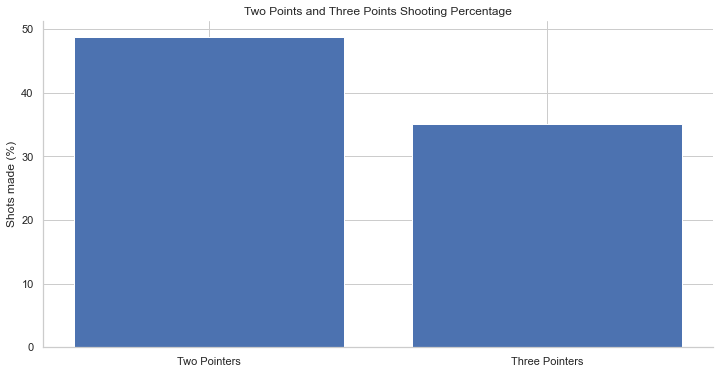

In [77]:
two_pointers_pct = all_shots_copy.query('pts_type == 2 and shot_result == "made"')['pts_type'].count() / all_shots_copy[all_shots_copy.pts_type == 2]['pts_type'].count()
three_pointers_pct = all_shots_copy.query('pts_type == 3 and shot_result == "made"')['pts_type'].count() / all_shots_copy[all_shots_copy.pts_type == 3]['pts_type'].count()
shots_pct = [two_pointers_pct * 100, three_pointers_pct  * 100]

plt.figure(figsize = [12, 6]);
plt.bar(x=['Two Pointers', 'Three Pointers'], height=shots_pct);
plt.ylabel('Shots made (%)');
plt.title('Two Points and Three Points Shooting Percentage');
sb.despine(left=False, bottom=False, right=True)

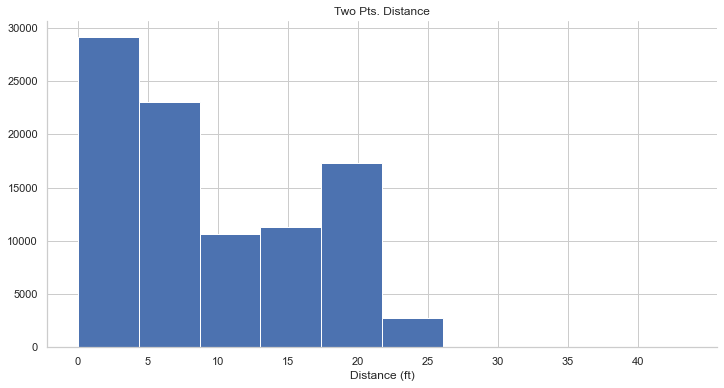

In [78]:
two_pts = all_shots_copy[all_shots_copy.pts_type == 2]
three_pts = all_shots_copy[all_shots_copy.pts_type == 3]

plt.figure(figsize = [12, 6]);

bin_edges = np.arange(0, int(two_pts.shot_dist.max()) + 1, 5) 
plt.title('Two Pts. Distance');
plt.xlabel('Distance (ft)');
plt.hist(two_pts.shot_dist);
plt.xticks(bin_edges, bin_edges);
sb.despine(left=False, bottom=False, right=True)

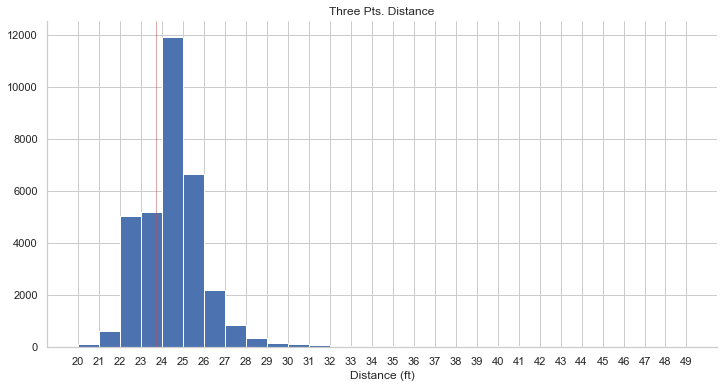

In [79]:
plt.figure(figsize=[12, 6])
bin_edges = np.arange(20, 50, 1)

plt.hist(three_pts.shot_dist, bins=bin_edges)
plt.axvline(x=23.75, linewidth=0.5, color='r');
plt.title('Three Pts. Distance');
plt.xticks(bin_edges, bin_edges);
plt.xlabel('Distance (ft)');
sb.despine(left=False, bottom=False, right=True)

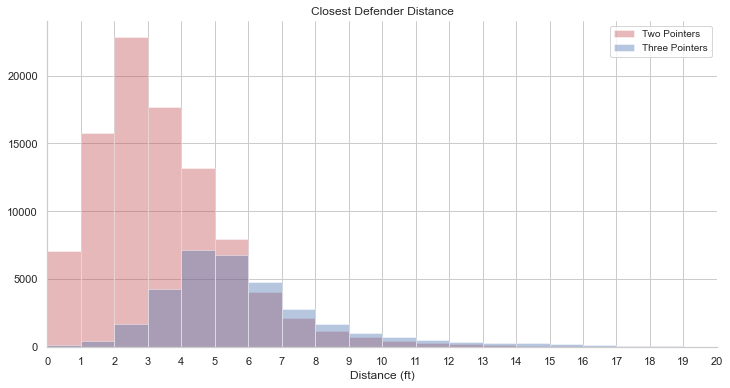

In [80]:
plt.figure(figsize = [12, 6]);
plt.title('Closest Defender Distance');

two_bin_edges = np.arange(0, int(two_pts.close_def_dist.max()) + 1, 1) 
plt.hist(two_pts.close_def_dist, color ='r', alpha=0.4, bins= two_bin_edges);

three_bin_edges = np.arange(0, int(three_pts.close_def_dist.max()) + 1, 1)
plt.hist(three_pts.close_def_dist, color ='b', alpha=0.4, bins = three_bin_edges);


plt.xticks(two_bin_edges, two_bin_edges);

plt.xlabel('Distance (ft)');
plt.xlim(0, 20); 
plt.legend(shot_types, prop={'size': 10});
sb.despine(left=False, bottom=False, right=True)

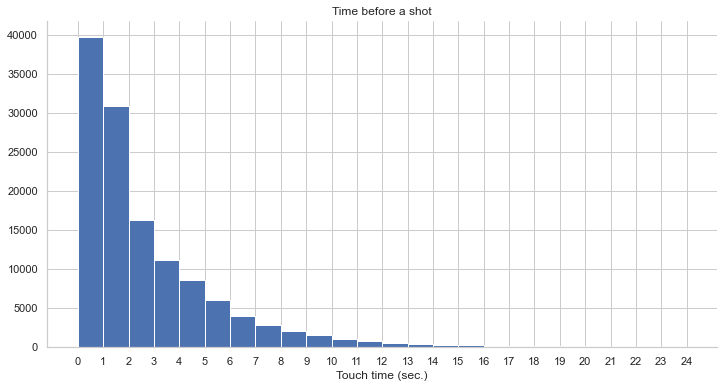

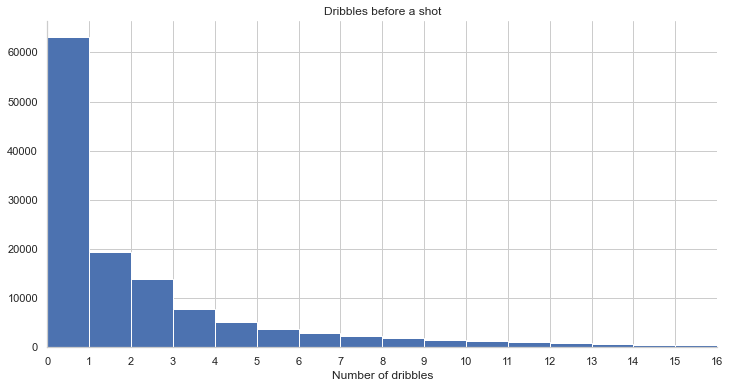

In [82]:
plt.figure(figsize = [12, 6]);
plt.title('Time before a shot');

bin_edges = np.arange(0, int(all_shots_copy.touch_time.max()) + 1, 1) 

plt.hist(all_shots_copy.touch_time, bins = bin_edges);
plt.xticks(bin_edges, bin_edges);
plt.xlabel('Touch time (sec.)');
sb.despine(left=False, bottom=False, right=True)

plt.figure(figsize = [12, 6]);
plt.title('Dribbles before a shot');

bin_edges = np.arange(0, int(all_shots_copy.dribbles.max()) + 1, 1) 

plt.hist(all_shots_copy.dribbles, bins = bin_edges);
plt.xticks(bin_edges, bin_edges);
plt.xlim(0, 16); 
plt.xlabel('Number of dribbles');
sb.despine(left=False, bottom=False, right=True)

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


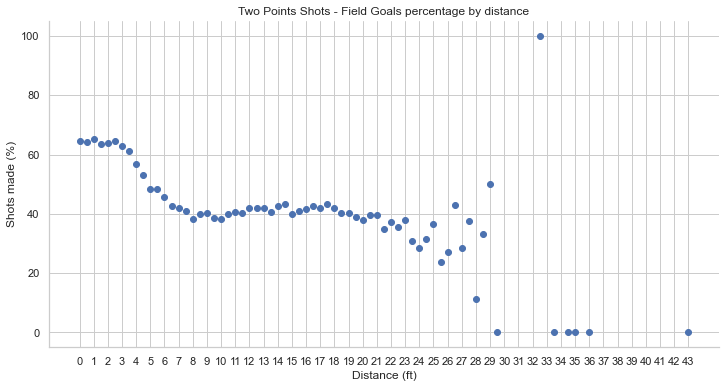

In [83]:
plt.figure(figsize = [12, 6]);

bins_size = np.arange(0, two_pts.shot_dist.max() + 0.8, 0.5)
bins_labels = bins_size[:-1]
two_pts_plot_labels = np.arange(0, int(two_pts.shot_dist.max()) + 1, 1)
two_pts.loc[:, 'shot_bin'] = pd.cut(two_pts.shot_dist, bins = bins_size, labels = bins_labels, include_lowest = True)

two_pts_by_bins = two_pts.groupby(['shot_bin', 'shot_result']).count()
two_pts_by_bins = two_pts_by_bins.reset_index()
two_pts_by_bins = two_pts_by_bins.pivot(index = "shot_bin", columns="shot_result", values="game_id")
two_pts_by_bins.loc[:, 'dist_pct'] = two_pts_by_bins.made / (two_pts_by_bins.made + two_pts_by_bins.missed) * 100

plt.scatter(x = two_pts_by_bins.index, y = two_pts_by_bins.dist_pct);
plt.xticks(two_pts_plot_labels, two_pts_plot_labels);
plt.ylabel('Shots made (%)');
plt.xlabel('Distance (ft)');
plt.title('Two Points Shots - Field Goals percentage by distance');
sb.despine(left=False, bottom=False, right=True)


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


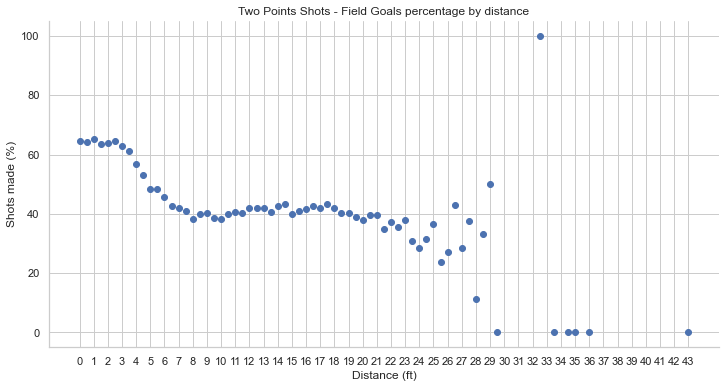

In [84]:
plt.figure(figsize = [12, 6]);

bins_size = np.arange(0, two_pts.shot_dist.max() + 0.8, 0.5)
bins_labels = bins_size[:-1]
two_pts_plot_labels = np.arange(0, int(two_pts.shot_dist.max()) + 1, 1)
two_pts.loc[:, 'shot_bin'] = pd.cut(two_pts.shot_dist, bins = bins_size, labels = bins_labels, include_lowest = True)

two_pts_by_bins = two_pts.groupby(['shot_bin', 'shot_result']).count()
two_pts_by_bins = two_pts_by_bins.reset_index()
two_pts_by_bins = two_pts_by_bins.pivot(index = "shot_bin", columns="shot_result", values="game_id")
two_pts_by_bins.loc[:, 'dist_pct'] = two_pts_by_bins.made / (two_pts_by_bins.made + two_pts_by_bins.missed) * 100

plt.scatter(x = two_pts_by_bins.index, y = two_pts_by_bins.dist_pct);
plt.xticks(two_pts_plot_labels, two_pts_plot_labels);
plt.ylabel('Shots made (%)');
plt.xlabel('Distance (ft)');
plt.title('Two Points Shots - Field Goals percentage by distance');
sb.despine(left=False, bottom=False, right=True)

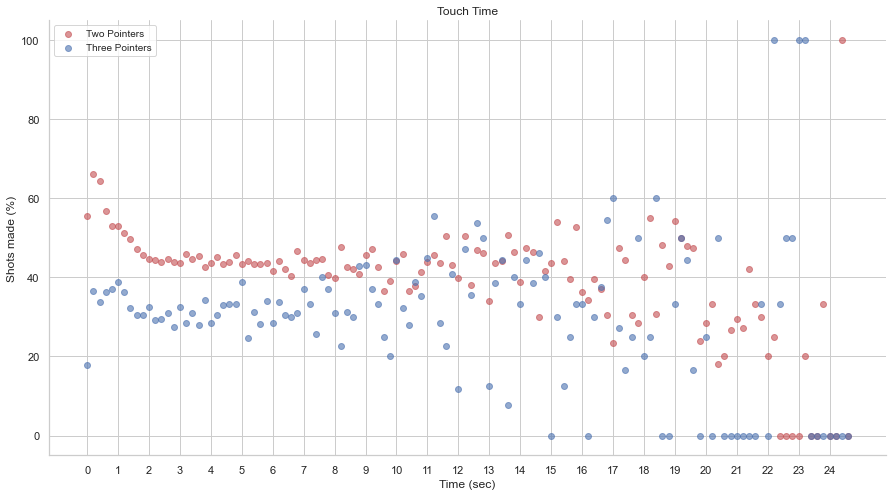

In [86]:
bins_size = np.arange(0, 24 + 1, 0.2)
bins_labels = bins_size[:-1]
touch_time_plot_labels = np.arange(0, int(two_pts.touch_time.max()) + 1, 1)

two_pts.loc[:, 'touch_time_bin'] = pd.cut(two_pts.touch_time, bins =bins_size, labels = bins_labels, include_lowest = True)

two_pts_by_touch_time = two_pts.groupby(['touch_time_bin', 'shot_result']).count()

two_pts_by_touch_time = two_pts_by_touch_time.reset_index()
two_pts_by_touch_time = two_pts_by_touch_time.pivot(index = "touch_time_bin", columns="shot_result", values="game_id")

two_pts_by_touch_time.loc[two_pts_by_touch_time.missed.isna(), "missed"] = 0
two_pts_by_touch_time.loc[two_pts_by_touch_time.made.isna(), "made"] = 0

two_pts_by_touch_time.loc[:, 'made'] = two_pts_by_touch_time.made.round(0).astype(int)
two_pts_by_touch_time.loc[:, 'missed'] = two_pts_by_touch_time.missed.round(0).astype(int)

two_pts_by_touch_time.loc[:, 'touch_time_pct'] = two_pts_by_touch_time.made / (two_pts_by_touch_time.made + two_pts_by_touch_time.missed) * 100
two_pts_by_touch_time.loc[two_pts_by_touch_time.touch_time_pct.isna(), "touch_time_pct"] = 0
bins_size = np.arange(0, 24 + 1, 0.2)
bins_labels = bins_size[:-1]
touch_time_plot_labels = np.arange(0, int(three_pts.touch_time.max()) + 1, 1)

three_pts.loc[:, 'touch_time_bin'] = pd.cut(three_pts.touch_time, bins =bins_size, labels = bins_labels, include_lowest = True)

three_pts_by_touch_time = three_pts.groupby(['touch_time_bin', 'shot_result']).count()

three_pts_by_touch_time = three_pts_by_touch_time.reset_index()
three_pts_by_touch_time = three_pts_by_touch_time.pivot(index = "touch_time_bin", columns="shot_result", values="game_id")

three_pts_by_touch_time.loc[three_pts_by_touch_time.missed.isna(), "missed"] = 0
three_pts_by_touch_time.loc[three_pts_by_touch_time.made.isna(), "made"] = 0

three_pts_by_touch_time.loc[:, 'made'] = three_pts_by_touch_time.made.round(0).astype(int)
three_pts_by_touch_time.loc[:, 'missed'] = three_pts_by_touch_time.missed.round(0).astype(int)

three_pts_by_touch_time.loc[:, 'touch_time_pct'] = three_pts_by_touch_time.made / (three_pts_by_touch_time.made + three_pts_by_touch_time.missed) * 100
three_pts_by_touch_time.loc[three_pts_by_touch_time.touch_time_pct.isna(), "touch_time_pct"] = 0
plt.figure(figsize = [15, 8]);

plt.scatter(x = two_pts_by_touch_time.index, y = two_pts_by_touch_time.touch_time_pct, color='r', alpha = 0.6);
plt.xticks(touch_time_plot_labels, touch_time_plot_labels) ; #, rotation = 90);

plt.scatter(x = three_pts_by_touch_time.index, y = three_pts_by_touch_time.touch_time_pct, color='b', alpha = 0.6);
plt.xticks(touch_time_plot_labels, touch_time_plot_labels); #, rotation = 90);
plt.ylabel('Shots made (%)');
plt.title('Touch Time');


plt.legend(shot_types, prop={'size': 10});
plt.xlabel('Time (sec)');
sb.despine(left=False, bottom=False, right=True)

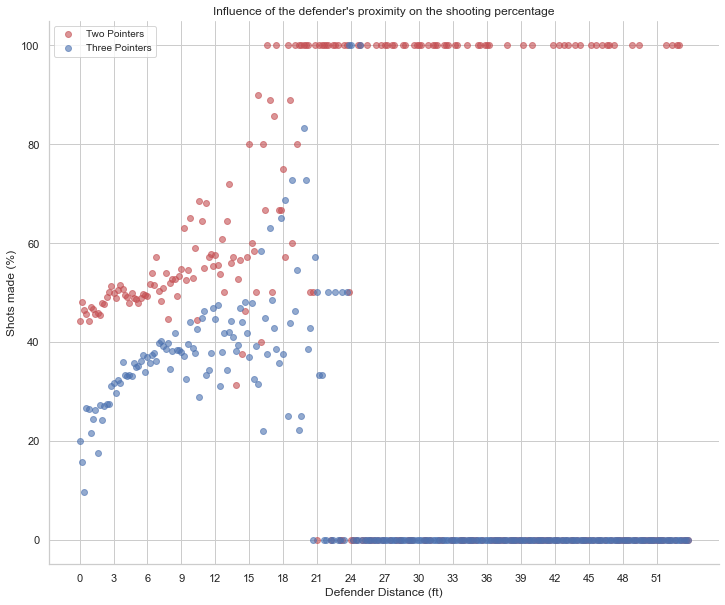

In [87]:
bins_size = np.arange(0, all_shots_copy.close_def_dist.max() + 1, 0.2)
bins_labels = bins_size[:-1]
def_dist_plot_labels = np.arange(0, int(all_shots_copy.close_def_dist.max()) + 1, 3)

two_pts.loc[:, 'def_dist_bin'] = pd.cut(two_pts.close_def_dist, bins =bins_size, labels = bins_labels, include_lowest = True)
three_pts.loc[:, 'def_dist_bin'] = pd.cut(three_pts.close_def_dist, bins =bins_size, labels = bins_labels, include_lowest = True)

two_pts_by_def_dist = two_pts.groupby(['def_dist_bin', 'shot_result']).count()
three_pts_by_def_dist = three_pts.groupby(['def_dist_bin', 'shot_result']).count()

two_pts_by_def_dist = two_pts_by_def_dist.reset_index()
two_pts_by_def_dist = two_pts_by_def_dist.pivot(index = "def_dist_bin", columns="shot_result", values="game_id")
three_pts_by_def_dist = three_pts_by_def_dist.reset_index()
three_pts_by_def_dist = three_pts_by_def_dist.pivot(index = "def_dist_bin", columns="shot_result", values="game_id")

two_pts_by_def_dist.loc[two_pts_by_def_dist.missed.isna(), "missed"] = 0
two_pts_by_def_dist.loc[two_pts_by_def_dist.made.isna(), "made"] = 0
three_pts_by_def_dist.loc[three_pts_by_def_dist.missed.isna(), "missed"] = 0
three_pts_by_def_dist.loc[three_pts_by_def_dist.made.isna(), "made"] = 0

two_pts_by_def_dist.loc[:, 'made'] = two_pts_by_def_dist.made.round(0).astype(int)
two_pts_by_def_dist.loc[:, 'missed'] = two_pts_by_def_dist.missed.round(0).astype(int)
three_pts_by_def_dist.loc[:, 'made'] = three_pts_by_def_dist.made.round(0).astype(int)
three_pts_by_def_dist.loc[:, 'missed'] = three_pts_by_def_dist.missed.round(0).astype(int)

two_pts_by_def_dist.loc[:, 'def_dist_pct'] = two_pts_by_def_dist.made / (two_pts_by_def_dist.made + two_pts_by_def_dist.missed) * 100
two_pts_by_def_dist.loc[two_pts_by_def_dist.def_dist_pct.isna(), "def_dist_pct"] = 0
three_pts_by_def_dist.loc[:, 'def_dist_pct'] = three_pts_by_def_dist.made / (three_pts_by_def_dist.made + three_pts_by_def_dist.missed) * 100
three_pts_by_def_dist.loc[three_pts_by_def_dist.def_dist_pct.isna(), "def_dist_pct"] = 0
plt.figure(figsize = [12, 10]);

plt.scatter(x = two_pts_by_def_dist.index, y = two_pts_by_def_dist.def_dist_pct, color='r', alpha = 0.6);
plt.scatter(x = three_pts_by_def_dist.index, y = three_pts_by_def_dist.def_dist_pct, color='b', alpha = 0.6);

plt.xticks(def_dist_plot_labels, def_dist_plot_labels);
plt.ylabel('Shots made (%)');
plt.xlabel('Defender Distance (ft)');
plt.legend(shot_types, prop={'size': 10});
plt.xlabel('Defender Distance (ft)');
plt.title('Influence of the defender\'s proximity on the shooting percentage');

sb.despine(left=False, bottom=False, right=True)

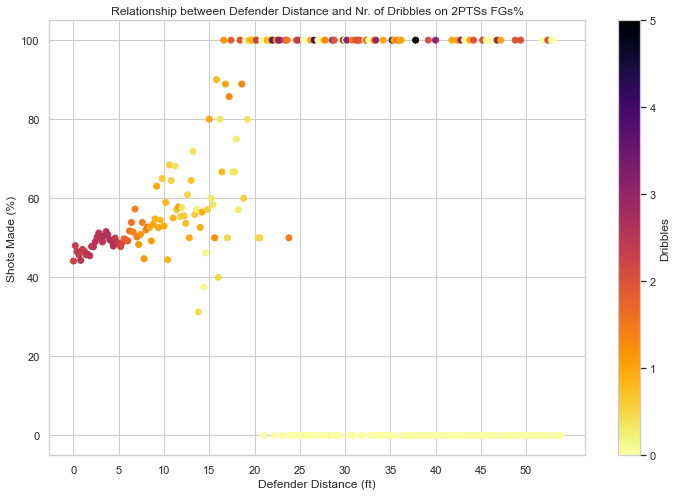

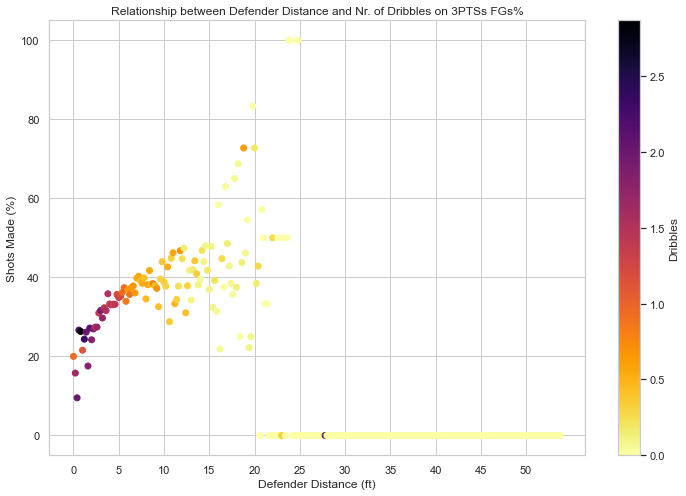

In [88]:
bins_size = np.arange(0, int(all_shots_copy.close_def_dist.max()) + 1, 5)
bins_labels = bins_size[:-1]

avg_dribbles = two_pts.groupby(['def_dist_bin']).dribbles.mean()

two_pts_by_def_dist['avg_dribbles'] = avg_dribbles
two_pts_by_def_dist.loc[two_pts_by_def_dist.avg_dribbles.isna(), 'avg_dribbles'] = 0

avg_touch_time = two_pts.groupby(['def_dist_bin']).touch_time.mean()
two_pts_by_def_dist['avg_touch_time'] = avg_touch_time
plt.figure(figsize = [12, 8]);
plt.scatter(data = two_pts_by_def_dist, x = two_pts_by_def_dist.index, y = 'def_dist_pct', c = 'avg_dribbles',
            cmap = 'inferno_r');
plt.xticks(bins_size, bins_size);
plt.title('Relationship between Defender Distance and Nr. of Dribbles on 2PTSs FGs%');
plt.xlabel('Defender Distance (ft)');
plt.ylabel('Shots Made (%)');
plt.colorbar(label ="Dribbles");

bins_size = np.arange(0, int(all_shots_copy.close_def_dist.max()) + 1, 5)
bins_labels = bins_size[:-1]

avg_dribbles = three_pts.groupby(['def_dist_bin']).dribbles.mean()

three_pts_by_def_dist['avg_dribbles'] = avg_dribbles
three_pts_by_def_dist.loc[three_pts_by_def_dist.avg_dribbles.isna(), 'avg_dribbles'] = 0

avg_touch_time = three_pts.groupby(['def_dist_bin']).touch_time.mean()
three_pts_by_def_dist['avg_touch_time'] = avg_touch_time
plt.figure(figsize = [12, 8]);
plt.scatter(data = three_pts_by_def_dist, x = three_pts_by_def_dist.index, y = 'def_dist_pct', c = 'avg_dribbles',
            cmap = 'inferno_r');
plt.xticks(bins_size, bins_size);
plt.title('Relationship between Defender Distance and Nr. of Dribbles on 3PTSs FGs%');
plt.xlabel('Defender Distance (ft)');
plt.ylabel('Shots Made (%)');
plt.colorbar(label="Dribbles");

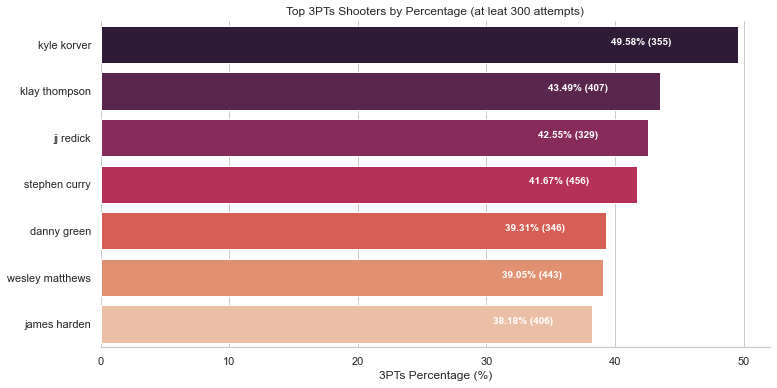

In [89]:
three_pts_copy = three_pts.copy()

top_shooters = three_pts_copy[three_pts_copy.groupby('player_id')['game_id'].transform('size') > 300].player_id.unique()
percentage = three_pts_copy[three_pts_copy.player_id.isin(top_shooters)].groupby(['player_name', 'shot_result']).game_id.count()

percentage = percentage.unstack()
percentage['pct'] = percentage.loc[:, 'made'] / (percentage.loc[:, 'made'] + percentage.loc[:, 'missed']) * 100
percentage['shots'] = percentage.loc[:, 'made'] + percentage.loc[:, 'missed']
percentage = percentage.sort_values(by="pct", ascending=True)

percentage = percentage[percentage.pct >= 37]
percentage = percentage.sort_values(by="pct", ascending=True)

label_perc = ["{}% ({})".format(round(j.pct, 2), int(j.shots)) for i, j in percentage.iterrows()]

plt.figure(figsize = [12, 6]);
plt.title('Top 3PTs Shooters by Percentage (at leat 300 attempts)');


players = percentage.sort_values(by="pct", ascending=False).index
ax = sb.barplot(data=percentage.sort_values("pct", ascending=False), x="pct", y= players, palette="rocket");
plt.xlabel('3PTs Percentage (%)');
ax.set_ylabel('')
y = np.arange(len(percentage), 0, -1)
g = len(y)-1

for i,j in percentage.sort_values(by="pct", ascending=False).iterrows():    
    ax.text(j.pct-(j.pct*.2), y[g]-1, label_perc[g] , color="w", weight="bold");
    g -= 1

    
sb.despine(left=True, bottom=False, right=True)

In [90]:
top_3p = percentage.index
by_dist = three_pts_copy[three_pts_copy.player_name.isin(top_3p)].groupby('player_name').shot_dist.mean().sort_values(ascending=False)
by_def_dist = three_pts_copy[three_pts_copy.player_name.isin(top_3p)].groupby('player_name').close_def_dist.mean().sort_values(ascending=False)
by_touch_time = three_pts_copy[three_pts_copy.player_name.isin(top_3p)].groupby('player_name').touch_time.mean().sort_values(ascending=False)
by_dribbles = three_pts_copy[three_pts_copy.player_name.isin(top_3p)].groupby('player_name').dribbles.mean().sort_values(ascending=False)

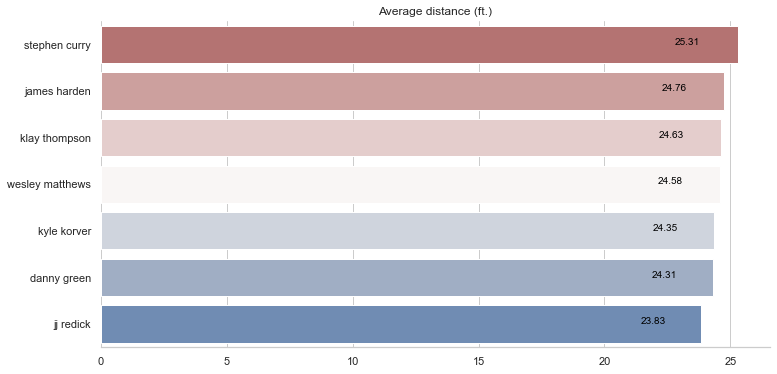

In [91]:
plt.figure(figsize = [12, 6]);
plt.title('Average distance (ft.)');
label_dist = [round(j, 2) for i, j in by_dist.sort_values(ascending=True).iteritems()]

ax = sb.barplot( x = by_dist, y = by_dist.index, palette="vlag_r");
ax.set_xlabel('')
ax.set_ylabel('')
y = np.arange(len(by_dist), 0, -1)
g = len(y)-1

for i,j in by_dist.sort_values(ascending=False).iteritems():
    ax.text(j -(j *.1), y[g]-1, label_dist[g] , color="black");
    g -= 1 
    
sb.despine(left=True, bottom=False, right=True)

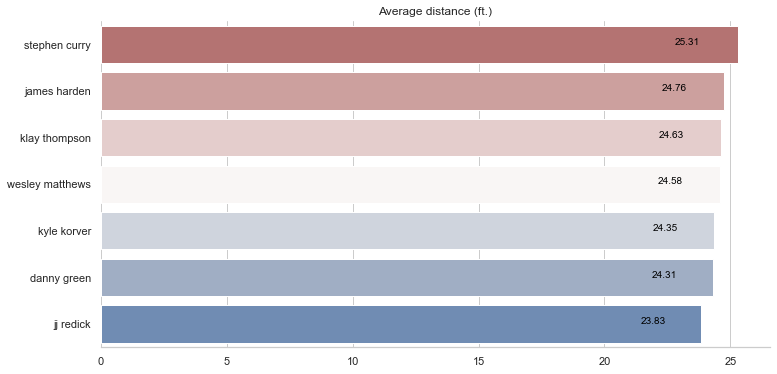

In [92]:
plt.figure(figsize = [12, 6]);
plt.title('Average distance (ft.)');
label_dist = [round(j, 2) for i, j in by_dist.sort_values(ascending=True).iteritems()]

ax = sb.barplot( x = by_dist, y = by_dist.index, palette="vlag_r");
ax.set_xlabel('')
ax.set_ylabel('')
y = np.arange(len(by_dist), 0, -1)
g = len(y)-1

for i,j in by_dist.sort_values(ascending=False).iteritems():
    ax.text(j -(j *.1), y[g]-1, label_dist[g] , color="black");
    g -= 1 
    
sb.despine(left=True, bottom=False, right=True)

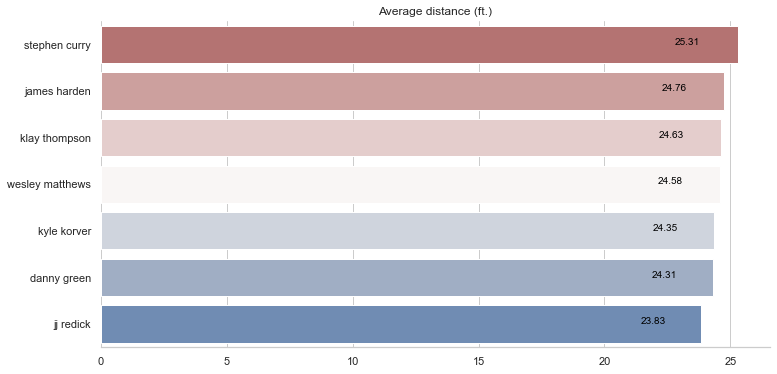

In [93]:
plt.figure(figsize = [12, 6]);
plt.title('Average distance (ft.)');
label_dist = [round(j, 2) for i, j in by_dist.sort_values(ascending=True).iteritems()]

ax = sb.barplot( x = by_dist, y = by_dist.index, palette="vlag_r");
ax.set_xlabel('')
ax.set_ylabel('')
y = np.arange(len(by_dist), 0, -1)
g = len(y)-1

for i,j in by_dist.sort_values(ascending=False).iteritems():
    ax.text(j -(j *.1), y[g]-1, label_dist[g] , color="black");
    g -= 1 
    
sb.despine(left=True, bottom=False, right=True)